https://github.com/NikitaChizhov/deep_kalman_filter_for_BM/blob/master/Healing%20MNIST.ipynb

In [17]:
#  ! pip install mnist

In [18]:
import healing_mnist

In [19]:
seq_len = 30
hmnist = healing_mnist.HealingMNIST(seq_len=seq_len, square_count=0, square_size=5, noise_ratio=0.0, digits=range(10))

In [20]:
hmnist.train_images.shape

(60000, 30, 28, 28)

In [21]:
hmnist.train_rotations.shape

(60000, 30)

In [22]:
hmnist.test_images.shape

(10000, 30, 28, 28)

In [23]:
hmnist.test_rotations.shape

(10000, 30)

In [24]:
'''
hmnist = healing_mnist.HealingMNIST(seq_len=5, # 5 rotations of each digit
                                    square_count=3, # 3 out of 5 images have a square added to them
                                    square_size=5, # the square is 5x5
                                    noise_ratio=0.15, # on average, 20% of the image is eaten by noise,
                                    digits=range(10) # only include this digits
                                    )
'''

'\nhmnist = healing_mnist.HealingMNIST(seq_len=5, # 5 rotations of each digit\n                                    square_count=3, # 3 out of 5 images have a square added to them\n                                    square_size=5, # the square is 5x5\n                                    noise_ratio=0.15, # on average, 20% of the image is eaten by noise,\n                                    digits=range(10) # only include this digits\n                                    )\n'

In [25]:
# hmnist2 = he

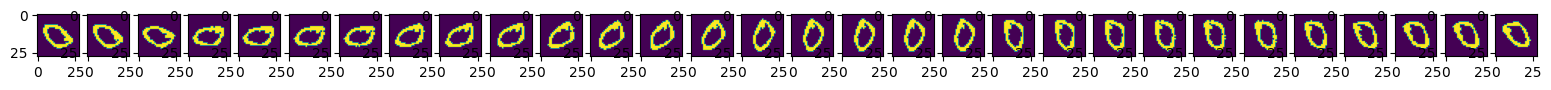

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,12))
for i, image in enumerate(hmnist.train_images[1]):
    fig.add_subplot(1, seq_len+1, i+1)
    plt.imshow(image)

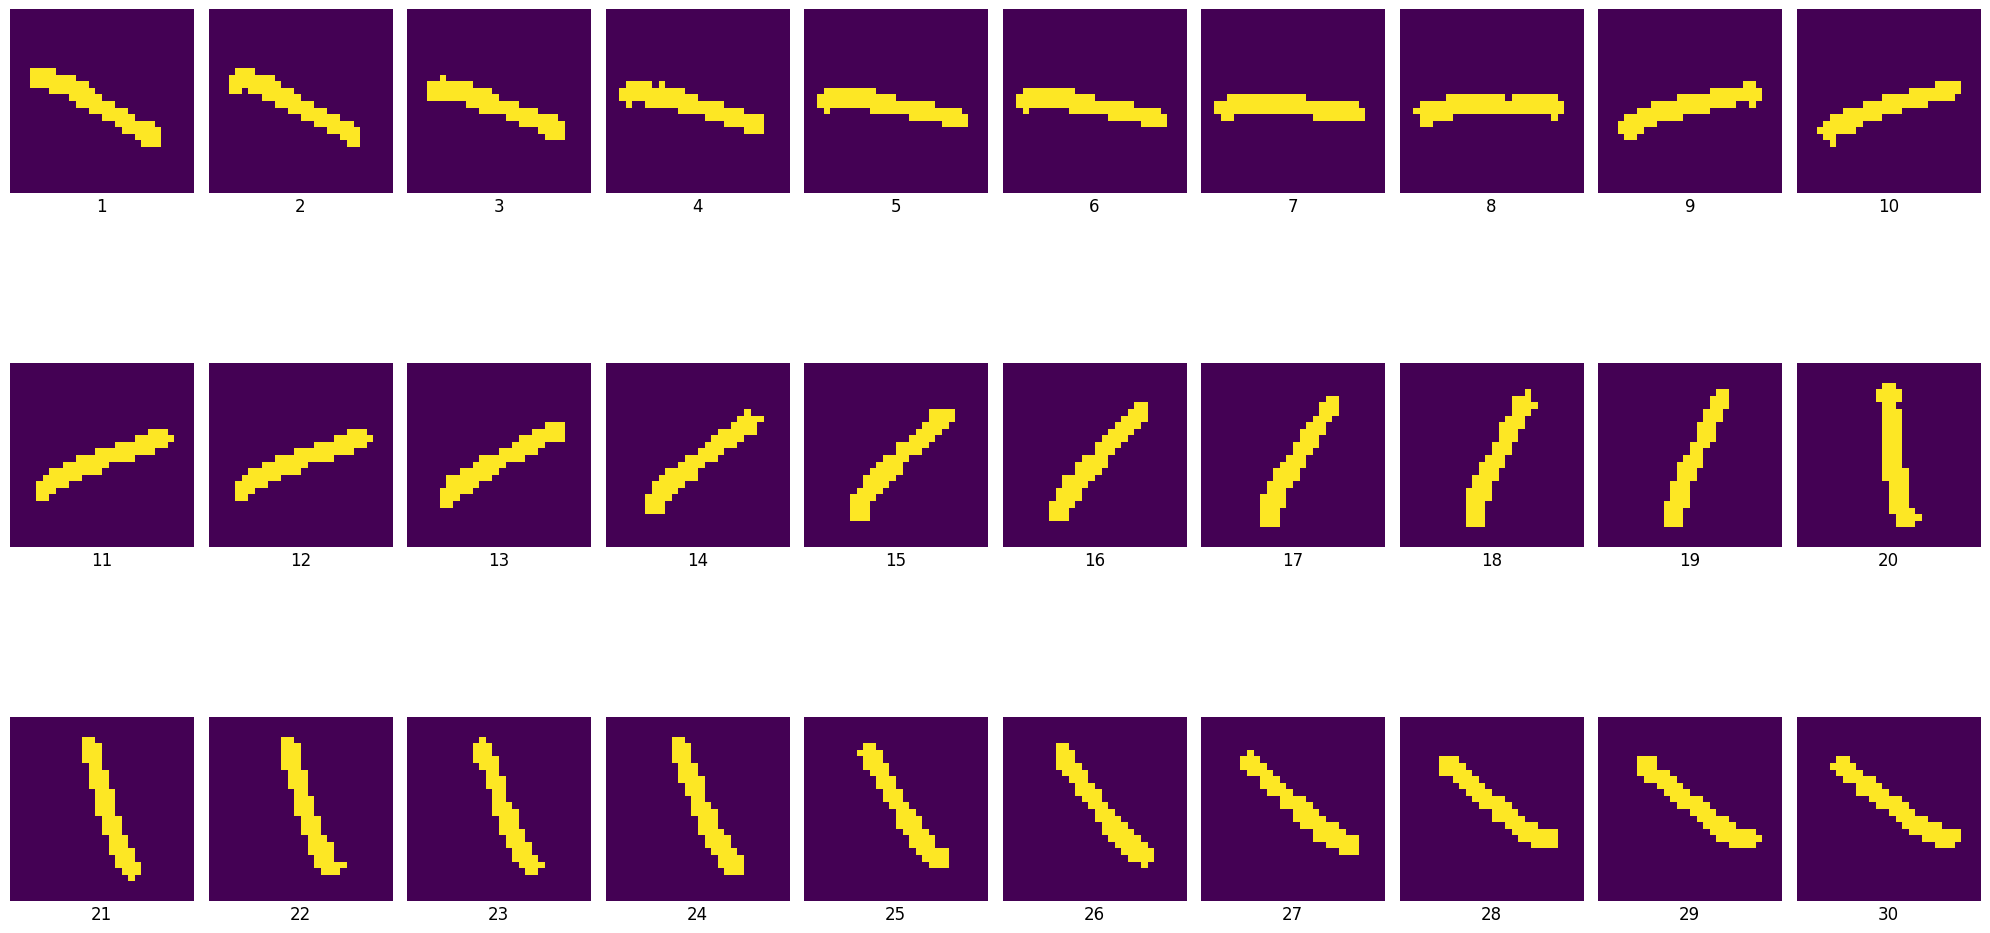

In [27]:
import math
num_images = len(hmnist.train_images[1])
images_per_row = 10

num_rows = math.ceil(num_images / images_per_row)

fig = plt.figure(figsize=(20, 12))

for i, image in enumerate(hmnist.train_images[3]):
    row = i // images_per_row
    col = i % images_per_row

    ax = fig.add_subplot(num_rows, images_per_row, i + 1)
    ax.imshow(image)
    ax.axis('off') 

    ax.text(0.5, -0.1, f"{i+1}", size=12, ha="center", transform=ax.transAxes)

plt.tight_layout() 
plt.show()

In [28]:
for rotation in hmnist.train_rotations[3]:
    print(rotation)

-88.28689322056388
-86.41687654839353
-79.32479758493923
-75.11140142165242
-69.22768026812697
-69.01058206727926
-62.83282910297179
-57.86327639907334
-44.949394638082175
-41.13670283673544
-38.216416779409386
-37.90749869842189
-29.532273484306664
-20.212372092092536
-13.656850225911285
-10.159543182809117
-0.4386327817807256
5.125352976395732
7.685898598881451
37.09341647530675
47.7340775422137
49.150510292256286
51.33837949573632
54.66470710529461
62.69366251824806
67.74112999479314
78.87010567467837
81.69032487318037
83.21709987974907
85.16947724803836


In [29]:
# print(hmnist.train_images[1][0])

In [30]:
import numpy as np

In [31]:
root_path = f'/Users/jiangxiaoyu/Desktop/All Projects/GPLVM_project_code/healing_mnist_data/len={seq_len}_squ=0_noise=0_digit=all'

import os
os.makedirs(root_path, exist_ok=True)
np.save(f'{root_path}/train.npy', hmnist.train_images)
np.save(f'{root_path}/test.npy', hmnist.test_images)